# Examining the Impact of Pell Grant Distribution on Graduation Rates: A Comparative Study of HBCUs and PWIs

## **Introduction**
In recent years, financial aid has become a pivotal factor in shaping student outcomes in higher education. Specifically, Pell Grants and federal grant aid have been central to supporting low-income students in their pursuit of a college degree. While much research has focused on individual student-level data, fewer studies have examined the institutional-level impact of financial aid on graduation rates. This paper explores the relationship between financial aid distribution,Pell Grants and institutional graduation rates within 150% of normal time. The study also considers how institutional type (2-year vs. 4-year), control (public vs. private), and Historically Black College and University (HBCU) status influence these outcomes.

## **Problem Statement**
Federal financial aid, especially Pell Grants, plays a significant role in supporting students from low-income backgrounds in U.S. higher education. However, the impact of Pell Grants on graduation rates within 150% of normal time remains unclear, particularly when comparing institutions with differing characteristics, such as 2-year vs. 4-year institutions and public vs. private nonprofit institutions. Additionally, the unique challenges faced by Historically Black Colleges and Universities (HBCUs) in relation to Pell Grant distribution and graduation rates warrant further investigation. This analysis hypothesizes that the percentage of students receiving Pell Grants positively influences graduation rates, with variations across institutional types and particularly within HBCUs.

## **Refined Research Questions**
1. What is the relationship between the proportion of students receiving Pell Grants and graduation rates within 150% of normal program time, and how does this relationship differ across two-year and four-year institutions?

2. In what ways do patterns of Pell Grant distribution relate to graduation outcomes at Historically Black Colleges and Universities (HBCUs) versus Predominantly White Institutions (PWIs), particularly in the context of racial equity in higher education?


## Data Importing and Cleaning 

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib as mb
import seaborn as sn

In [3]:
import os
current_directory = os.getcwd()
print(current_directory)

/home/81e8adb4-b981-4fde-9a1a-464275ba01ce/IC_data


In [4]:
PELL_GR_DATA = pd.read_csv('/home/81e8adb4-b981-4fde-9a1a-464275ba01ce/IC_data/DATA_GRAD_PELL_MERGED.csv', encoding='ISO-8859-1')


In [5]:
PELL_GR_DATA .head ()

,INS_ ID,INI_NAME,CITY,STATE,HBCU,DMV,PWI,IC_LEVEL,CONTROL,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
0,180203.0,Aaniiih Nakoda College,Harlem,MT,0.0,0.0,0.0,Four or more years,Public,34.0,29.0,85%,11.0,38%,5.0,0.0,0%,11.0,32%
1,222178.0,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,Four or more years,Private not-for-profit,940.0,280.0,30%,130.0,46%,444.0,309.0,70%,566.0,60%
2,222178.0,Abilene Christian University,Abilene,TX,0.0,0.0,1.0,Four or more years,Private not-for-profit,940.0,280.0,30%,130.0,46%,444.0,309.0,70%,566.0,60%
3,138558.0,Abraham Baldwin Agricultural College,Tifton,GA,0.0,0.0,1.0,Four or more years,Public,477.0,219.0,46%,67.0,31%,209.0,80.0,38%,166.0,35%
4,138558.0,Abraham Baldwin Agricultural College,Tifton,GA,0.0,0.0,1.0,Four or more years,Public,488.0,276.0,57%,45.0,16%,176.0,65.0,37%,115.0,24%


In [6]:
PELL_GR_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INS_ ID              6136 non-null   float64
 1   INI_NAME             6136 non-null   object 
 2   CITY                 6136 non-null   object 
 3   STATE                6136 non-null   object 
 4   HBCU                 6136 non-null   float64
 5   DMV                  6136 non-null   float64
 6   PWI                  6136 non-null   float64
 7   IC_LEVEL             6136 non-null   object 
 8   CONTROL              6136 non-null   object 
 9   total_cohort         6136 non-null   float64
 10  pell_cohort          6136 non-null   float64
 11  pell_percent         6135 non-null   object 
 12  pell_complete_150    6136 non-null   float64
 13  pell_grad_rate       5939 non-null   object 
 14  no_aid_cohort        6136 non-null   float64
 15  no_aid_complete_150  6136 non-null   f

In [7]:
PELL_GR_DATA.isnull().sum() # Missing values count

INS_ ID                  1
INI_NAME                 1
CITY                     1
STATE                    1
HBCU                     1
DMV                      1
PWI                      1
IC_LEVEL                 1
CONTROL                  1
total_cohort             1
pell_cohort              1
pell_percent             2
pell_complete_150        1
pell_grad_rate         198
no_aid_cohort            1
no_aid_complete_150      1
no_aid_grad_rate       229
total_complete_150       1
Grad_rate                2
dtype: int64

In [8]:
PELL_GR_DATA.describe(include='all') # Statistical summary with all data types

,INS_ ID,INI_NAME,CITY,STATE,HBCU,DMV,PWI,IC_LEVEL,CONTROL,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
count,6136.000000,6136,6136,6136,6136.000000,6136.000000,6136.000000,6136,6136,6136.000000,6136.000000,6135,6136.000000,5939,6136.000000,6136.000000,5908,6136.000000,6135
unique,NaN,2797,1580,51,NaN,NaN,NaN,2,2,NaN,NaN,97,NaN,101,NaN,NaN,98,NaN,97
top,NaN,Columbia College,New York,NY,NaN,NaN,NaN,Four or more years,Public,NaN,NaN,0%,NaN,0%,NaN,NaN,0%,NaN,33%
freq,NaN,10,68,490,NaN,NaN,NaN,4645,3161,NaN,NaN,196,NaN,185,NaN,NaN,260,NaN,144
mean,203452.020046,NaN,NaN,NaN,0.023631,0.036343,0.519557,NaN,NaN,650.960724,245.845339,NaN,108.207790,NaN,304.453064,190.450130,NaN,361.927803,NaN
std,86650.068880,NaN,NaN,NaN,0.151909,0.187157,0.499658,NaN,NaN,1057.888341,379.275120,NaN,202.195639,NaN,598.279013,480.295771,NaN,771.907073,NaN
min,100654.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN
25%,154371.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,93.000000,42.750000,NaN,14.000000,NaN,24.000000,10.000000,NaN,34.000000,NaN
50%,189556.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,300.500000,122.000000,NaN,49.000000,NaN,107.000000,48.000000,NaN,123.000000,NaN
75%,217477.250000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,715.000000,281.000000,NaN,111.000000,NaN,310.250000,153.000000,NaN,336.000000,NaN


In [9]:
PELL_GR_DATA.columns.tolist()

['INS_ ID',
 'INI_NAME',
 'CITY',
 'STATE',
 'HBCU',
 'DMV',
 'PWI',
 'IC_LEVEL',
 'CONTROL',
 'total_cohort',
 'pell_cohort',
 'pell_percent',
 'pell_complete_150',
 'pell_grad_rate',
 'no_aid_cohort',
 'no_aid_complete_150',
 'no_aid_grad_rate',
 'total_complete_150',
 'Grad_rate']

In [10]:
PELL_GR_DATA.dtypes # Data types of columns

INS_ ID                float64
INI_NAME                object
CITY                    object
STATE                   object
HBCU                   float64
DMV                    float64
PWI                    float64
IC_LEVEL                object
CONTROL                 object
total_cohort           float64
pell_cohort            float64
pell_percent            object
pell_complete_150      float64
pell_grad_rate          object
no_aid_cohort          float64
no_aid_complete_150    float64
no_aid_grad_rate        object
total_complete_150     float64
Grad_rate               object
dtype: object

In [17]:
PELL_GR_DATA.shape[0] # number of rows

6137

In [18]:
PELL_GR_DATA.shape[1] # number of Columns

19

In [19]:
print(f"Rows: {PELL_GR_DATA.shape[0]}, Columns: {PELL_GR_DATA.shape[1]}")

Rows: 6137, Columns: 19


### Convert the percentages from object to float by removing the '%' symbol and converting the values to decimals

In [22]:
PELL_GR_DATA['Grad_rate'] = pd.to_numeric(PELL_GR_DATA['Grad_rate'].astype(str).str.rstrip('%'), errors='coerce') / 100


In [24]:
PELL_GR_DATA['pell_percent'] = pd.to_numeric(PELL_GR_DATA['pell_percent'].astype(str).str.rstrip('%'), errors='coerce') / 100


In [25]:
PELL_GR_DATA['pell_grad_rate'] = pd.to_numeric(PELL_GR_DATA['pell_grad_rate'].astype(str).str.rstrip('%'), errors='coerce') / 100


In [26]:
PELL_GR_DATA['no_aid_grad_rate'] = pd.to_numeric(PELL_GR_DATA['no_aid_grad_rate'].astype(str).str.rstrip('%'), errors='coerce') / 100


In [27]:
PELL_GR_DATA.describe()

,INS_ ID,HBCU,DMV,PWI,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
count,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6135.000000,6136.000000,5939.000000,6136.000000,6136.000000,5908.000000,6136.000000,6135.000000
mean,203452.020046,0.023631,0.036343,0.519557,650.960724,245.845339,0.004467,108.207790,0.431837,304.453064,190.450130,0.513152,361.927803,0.004732
std,86650.068880,0.151909,0.187157,0.499658,1057.888341,379.275120,0.002023,202.195639,0.221012,598.279013,480.295771,0.240533,771.907073,0.002181
min,100654.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154371.000000,0.000000,0.000000,0.000000,93.000000,42.750000,0.003200,14.000000,0.280000,24.000000,10.000000,0.340000,34.000000,0.003100
50%,189556.000000,0.000000,0.000000,1.000000,300.500000,122.000000,0.004400,49.000000,0.400000,107.000000,48.000000,0.520000,123.000000,0.004600
75%,217477.250000,0.000000,0.000000,1.000000,715.000000,281.000000,0.005600,111.000000,0.550000,310.250000,153.000000,0.690000,336.000000,0.006100
max,498906.000000,1.000000,1.000000,1.000000,11163.000000,9783.000000,0.010000,5178.000000,1.000000,6546.000000,5711.000000,1.000000,8458.000000,0.010000


In [30]:
PELL_GR =PELL_GR_DATA.round(2)

In [31]:
PELL_GR.describe()

,INS_ ID,HBCU,DMV,PWI,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
count,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6135.000000,6136.000000,5939.000000,6136.000000,6136.000000,5908.000000,6136.000000,6135.000000
mean,203452.020046,0.023631,0.036343,0.519557,650.960724,245.845339,0.003579,108.207790,0.431837,304.453064,190.450130,0.513152,361.927803,0.004132
std,86650.068880,0.151909,0.187157,0.499658,1057.888341,379.275120,0.004794,202.195639,0.221012,598.279013,480.295771,0.240533,771.907073,0.004924
min,100654.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154371.000000,0.000000,0.000000,0.000000,93.000000,42.750000,0.000000,14.000000,0.280000,24.000000,10.000000,0.340000,34.000000,0.000000
50%,189556.000000,0.000000,0.000000,1.000000,300.500000,122.000000,0.000000,49.000000,0.400000,107.000000,48.000000,0.520000,123.000000,0.000000
75%,217477.250000,0.000000,0.000000,1.000000,715.000000,281.000000,0.010000,111.000000,0.550000,310.250000,153.000000,0.690000,336.000000,0.010000
max,498906.000000,1.000000,1.000000,1.000000,11163.000000,9783.000000,0.010000,5178.000000,1.000000,6546.000000,5711.000000,1.000000,8458.000000,0.010000


In [32]:
PELL_GR_CLEANED=PELL_GR_DATA.dropna()

In [33]:
PELL_GR_CLEANED.describe()

,INS_ ID,HBCU,DMV,PWI,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
count,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000
mean,199430.381276,0.023361,0.036437,0.519003,692.368550,261.416841,0.004479,115.286960,0.431789,324.140690,202.455021,0.513162,385.018480,0.004718
std,80898.150165,0.151061,0.187390,0.499682,1080.735503,386.762391,0.001723,207.175902,0.213558,612.751392,493.350818,0.234786,792.405427,0.002023
min,100654.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000300,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,153922.000000,0.000000,0.000000,0.000000,125.000000,57.000000,0.003300,20.000000,0.280000,35.000000,15.000000,0.340000,48.000000,0.003200
50%,188225.000000,0.000000,0.000000,1.000000,332.000000,134.000000,0.004400,53.000000,0.400000,121.000000,57.000000,0.520000,139.500000,0.004600
75%,215704.000000,0.000000,0.000000,1.000000,759.000000,303.000000,0.005600,120.000000,0.550000,332.000000,165.250000,0.690000,362.000000,0.006100
max,498571.000000,1.000000,1.000000,1.000000,11163.000000,9783.000000,0.009700,5178.000000,1.000000,6546.000000,5711.000000,1.000000,8458.000000,0.010000


In [34]:
PELL_GR_CLEANED.isnull().sum() # Missing values count

INS_ ID                0
INI_NAME               0
CITY                   0
STATE                  0
HBCU                   0
DMV                    0
PWI                    0
IC_LEVEL               0
CONTROL                0
total_cohort           0
pell_cohort            0
pell_percent           0
pell_complete_150      0
pell_grad_rate         0
no_aid_cohort          0
no_aid_complete_150    0
no_aid_grad_rate       0
total_complete_150     0
Grad_rate              0
dtype: int64

# Data Description

## Data Sources

The data for this study is obtained from the Integrated Postsecondary Education Data System (IPEDS), a U.S. Department of Education program that provides comprehensive data on U.S. colleges, universities, and technical and vocational institutions. The specific surveys used in this analysis are as follows:

- **Graduation Rates (GR) Survey**: Provides institutional-level data on graduation rates within 150% of normal time for first-time, full-time undergraduates.
- **Student Financial Aid (SFA) Survey**: Contains data on the percentage of students receiving Pell Grants and federal grant aid.
- **Institutional Characteristics (IC) Survey**: Includes data on institutional type (2-year vs. 4-year), control (public vs. private), and HBCU status.

## Dataset

This study uses institutional-level data from the 2022-2023 IPEDS database. The data is aggregated at the institutional level, meaning individual student data is not available. Instead, the analysis is based on is based on averages to identify trends and relationships across various institutions.

## Variables

### Dependent Variable

- **pell_grad_rate**: Graduation rate within 150% of normal time for first-time, full-time pell recipient undergraduates .


### Independent Variables
- **pell_percent**: Percentage of undergraduates receiving Pell Grants (Continuous).
- **IC_LEVEL**: Institutional level (2-year vs. 4-year) (Binary: 1 = 4-year, 0 = 2-year).
- **CONTROL**: Institutional control (Public, Private Nonprofit, Private for profit (Continuous).

### Control Variable:

- **HBCU**: Historically Black College or University status (Binary: 1 = Yes, 0 = No).

## Data Columns

The dataset includes the following columns:

- **INS_ID**: Institution ID
- **INI_NAME**: Institution name
- **CITY**: City where the institution is located
- **STATE**: State where the institution is located
- **HBCU**: HBCU status (Binary: 1 = Yes, 0 = No)
- **DMV**: Indicator for institutions in the D.C., Maryland, Virginia area (if applicable)
- **PWI**: Indicator for Predominantly White Institutions (if applicable)
- **IC_LEVEL**: Institutional level (2-year vs. 4-year)
- **CONTROL**: Institutional control (Public, Private Nonprofit, Private For-Profit)
- **total_cohort**: Total number of students in the cohort
- **pell_cohort**: Number of students receiving Pell Grants in the cohort
- **pell_percent**: Percentage of students receiving Pell Grants
- **pell_complete_150**: Number of Pell Grant recipients who graduate within 150% of normal time
- **pell_grad_rate**: Graduation rate for Pell Grant recipients within 150% of normal time
- **no_aid_cohort**: Number of students not receiving Pell Grants in the cohort
- **no_aid_complete_150**: Number of non-Pell Grant recipients who graduate within 150% of normal time
- **no_aid_grad_rate**: Graduation rate for non-Pell Grant recipients within 150% of normal time
- **total_complete_150**: Total number of students who graduate within 150% of normal time
- **Grad_rate**: Overall graduation rate within 150% of normal time
- **HBCU**: HBCU status


## **Understanding the PELL_GR_CLEANED Dataset**

In [35]:
# Checking first elements of the DataFrame PELL_GR_CLEANED with .head() method
PELL_GR_CLEANED.head()

,INS_ ID,INI_NAME,CITY,STATE,HBCU,DMV,PWI,IC_LEVEL,CONTROL,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
0,180203.0,Aaniiih Nakoda College,Harlem,MT,0.0,0.0,0.0,Four or more years,Public,34.0,29.0,0.0085,11.0,0.38,5.0,0.0,0.00,11.0,0.0032
1,222178.0,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,Four or more years,Private not-for-profit,940.0,280.0,0.0030,130.0,0.46,444.0,309.0,0.70,566.0,0.0060
2,222178.0,Abilene Christian University,Abilene,TX,0.0,0.0,1.0,Four or more years,Private not-for-profit,940.0,280.0,0.0030,130.0,0.46,444.0,309.0,0.70,566.0,0.0060
3,138558.0,Abraham Baldwin Agricultural College,Tifton,GA,0.0,0.0,1.0,Four or more years,Public,477.0,219.0,0.0046,67.0,0.31,209.0,80.0,0.38,166.0,0.0035
4,138558.0,Abraham Baldwin Agricultural College,Tifton,GA,0.0,0.0,1.0,Four or more years,Public,488.0,276.0,0.0057,45.0,0.16,176.0,65.0,0.37,115.0,0.0024


In [36]:
# Checking last elements of the DataFrame  PELL_GR_CLEANED with .tail() method
PELL_GR_CLEANED.tail()

,INS_ ID,INI_NAME,CITY,STATE,HBCU,DMV,PWI,IC_LEVEL,CONTROL,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
6131,206695.0,Youngstown State University,Youngstown,OH,0.0,0.0,1.0,Four or more years,Public,2124.0,896.0,0.0042,391.0,0.44,883.0,573.0,0.65,1135.0,0.0053
6132,206695.0,Youngstown State University,Youngstown,OH,0.0,0.0,0.0,Four or more years,Public,40.0,26.0,0.0065,8.0,0.31,11.0,2.0,0.18,10.0,0.0025
6133,206695.0,Youngstown State University,Youngstown,OH,0.0,0.0,1.0,Four or more years,Public,40.0,26.0,0.0065,8.0,0.31,11.0,2.0,0.18,10.0,0.0025
6134,126119.0,Yuba College,Marysville,CA,0.0,0.0,0.0,At least 2 but less than 4 years,Public,307.0,164.0,0.0053,54.0,0.33,143.0,45.0,0.31,99.0,0.0032
6135,204255.0,Zane State College,Zanesville,OH,0.0,0.0,1.0,Four or more years,Public,202.0,97.0,0.0048,39.0,0.40,84.0,57.0,0.68,107.0,0.0053


In [37]:
# State the shape of the data frame PELL_GR_CLEANED
PELL_GR_CLEANED.shape  # Returns (rows, columns)


(5736, 19)

In [39]:
# How many rows does the data frame PELL_GR_CLEANED have?
PELL_GR_CLEANED.shape[0]

5736

In [40]:
# How many columns does the data frame ELL_GR_CLEANED have?
PELL_GR_CLEANED.shape[1]

19

In [41]:
# What is the total number of data points expected in the data set (rows x columns)?
PELL_GR_CLEANED.shape[0] * PELL_GR_CLEANED.shape[1]

108984

In [42]:
# Update only the 'HBCU' column data type to binary (0/1)
PELL_GR_CLEANED.loc[:, 'HBCU'] = PELL_GR_CLEANED['HBCU'].astype('int')

In [31]:
# Checking for missing values
PELL_GR_CLEANED.isnull().sum()

INS_ ID                0
INI_NAME               0
CITY                   0
STATE                  0
HBCU                   0
DMV                    0
PWI                    0
IC_LEVEL               0
CONTROL                0
total_cohort           0
pell_cohort            0
pell_percent           0
pell_complete_150      0
pell_grad_rate         0
no_aid_cohort          0
no_aid_complete_150    0
no_aid_grad_rate       0
total_complete_150     0
Grad_rate              0
dtype: int64

In [43]:
# Check the data types with .info() method
PELL_GR_CLEANED.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5736 entries, 0 to 6135
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INS_ ID              5736 non-null   float64
 1   INI_NAME             5736 non-null   object 
 2   CITY                 5736 non-null   object 
 3   STATE                5736 non-null   object 
 4   HBCU                 5736 non-null   float64
 5   DMV                  5736 non-null   float64
 6   PWI                  5736 non-null   float64
 7   IC_LEVEL             5736 non-null   object 
 8   CONTROL              5736 non-null   object 
 9   total_cohort         5736 non-null   float64
 10  pell_cohort          5736 non-null   float64
 11  pell_percent         5736 non-null   float64
 12  pell_complete_150    5736 non-null   float64
 13  pell_grad_rate       5736 non-null   float64
 14  no_aid_cohort        5736 non-null   float64
 15  no_aid_complete_150  5736 non-null   float6

### **Data Cleaning Summary**

The data set has been cleaned by:
- Correcting data types.
- Addressing missing values.
- Converting percentages to decimals.

The data is now ready for the next steps in the analysis.


## **Correlation Matrix**

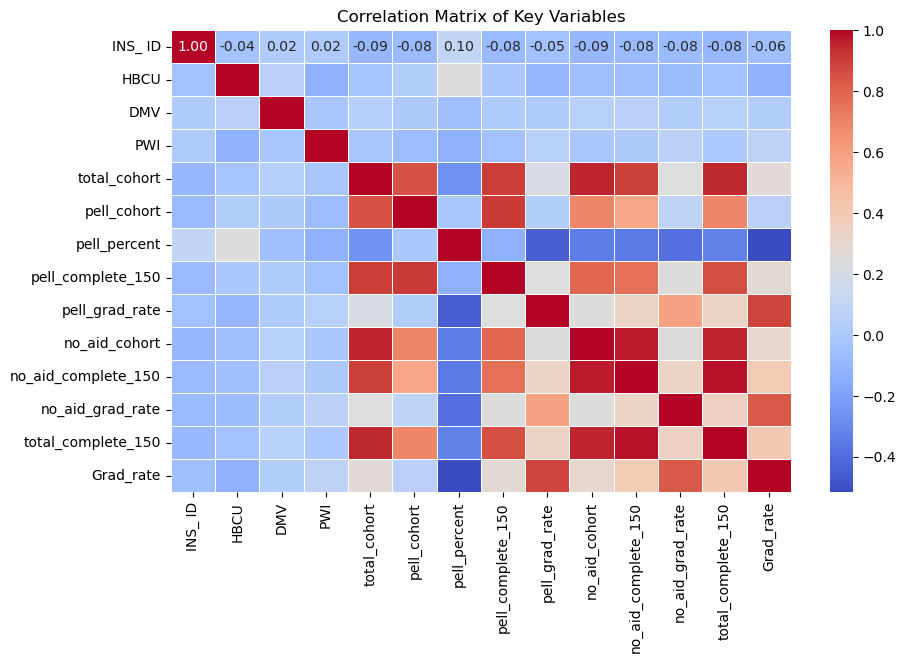

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Copy dataset for safety
PELL_GR = PELL_GR_CLEANED.copy()

# Selecting only numeric columns for correlation
corr_matrix = PELL_GR.select_dtypes(include=['number']).corr()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Key Variables')

# Show the plot
plt.show()


### **Key Variable Pairs to Analyze:**

- **Pell Grant Graduation Rate vs. Non-Pell Graduation Rate**  
  - To see if institutions with higher non-Pell grad rates also have higher Pell grad rates.

- **Pell Percentage vs. Pell Graduation Rate**  
  - To check if institutions with more Pell recipients tend to have higher/lower Pell graduation rates.

- **Institutional Control vs. Pell Graduation Rate**  
  - To compare public, private nonprofit, and private for-profit institutions.

- **HBCU vs. Pell Graduation Rate**  
  - To analyze differences between HBCUs and PWIs.

### **Visualization of Pell Grant Graduation Rates Across Institution Types**

This code creates a grouped bar plot comparing Pell Grant graduation rates across different institution control types (Public vs Private) and institution levels (2-year vs 4-year). It uses the `seaborn` library for the bar plot and `matplotlib` for customization. The plot visually highlights how Pell Grant graduation rates vary across categories.

**Key Insights**:
- **Institution Control**: Public vs Private
- **Institution Level**: 2-year vs 4-year


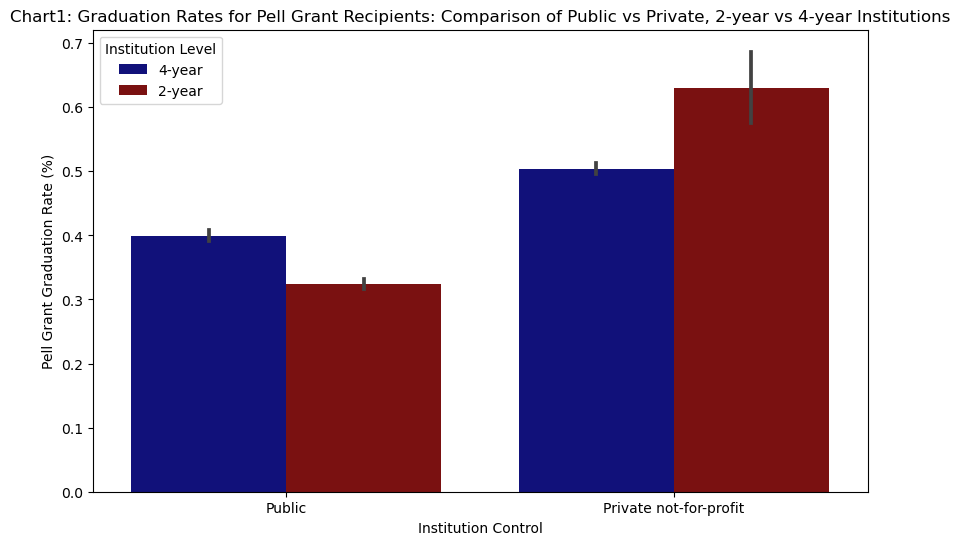

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a grouped bar plot comparing Pell Grant graduation rates across categories
PELL_GR_CLEANED.loc[:,"IC_LEVEL"]=PELL_GR_CLEANED["IC_LEVEL"].replace({"Four or more years":"4-year","At least 2 but less than 4 years":"2-year"})
plt.figure(figsize=(10,6))
sns.barplot(
    data=PELL_GR_CLEANED,
    x='CONTROL',
    y='pell_grad_rate',
    hue='IC_LEVEL',
    palette=['darkblue', 'darkred']
)
plt.title('Chart1: Graduation Rates for Pell Grant Recipients: Comparison of Public vs Private, 2-year vs 4-year Institutions')
plt.xlabel('Institution Control')
plt.ylabel('Pell Grant Graduation Rate (%)')
plt.legend(title='Institution Level')
plt.show()


### **Visualizing Graduation Rates of Pell Recipients by HBCU Status**

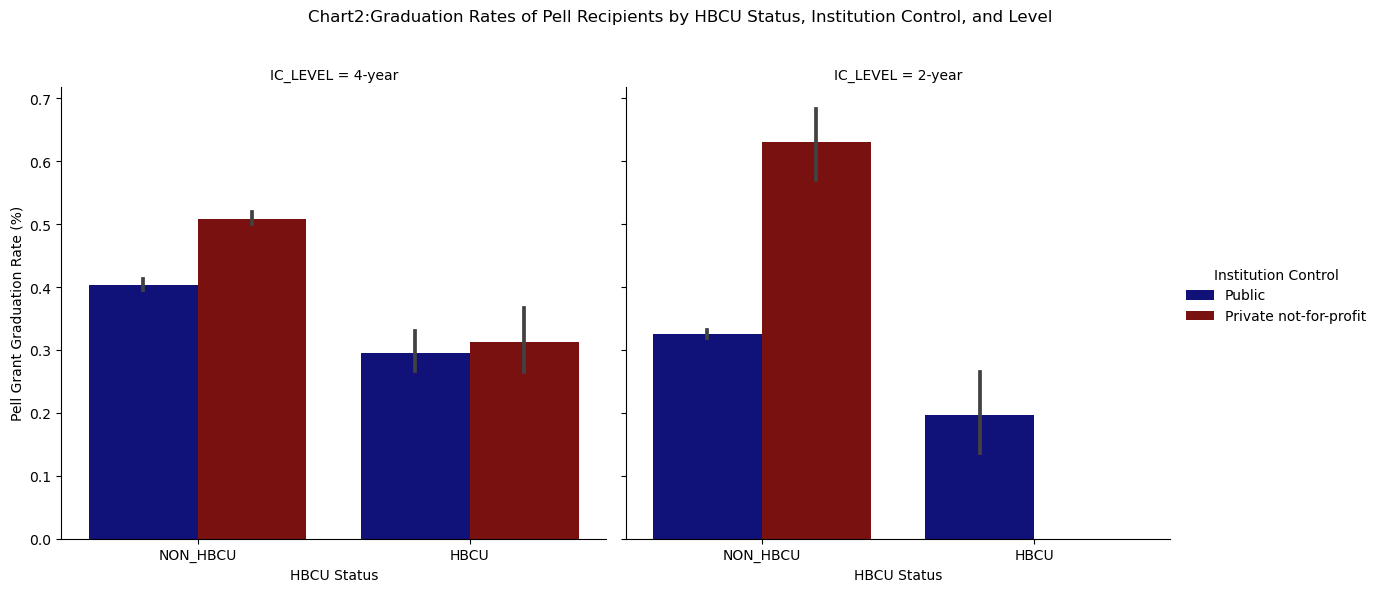

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 0 with "NON_HBCU" and 1 with "HBCU" 
PELL_GR_CLEANED.loc[:, "HBCU"] = PELL_GR_CLEANED["HBCU"].replace({0: "NON_HBCU", 1: "HBCU"})

# Define custom colors for CONTROL
palette = ['darkblue', 'darkred']

# Create a faceted bar plot
g = sns.catplot(
    data=PELL_GR_CLEANED,
    x="HBCU",
    y="pell_grad_rate",
    hue="CONTROL",
    col="IC_LEVEL",
    kind="bar",
    palette=palette,
    height=6,
    aspect=1
)

# Customize titles and labels
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Chart2:Graduation Rates of Pell Recipients by HBCU Status, Institution Control, and Level")
g.set_axis_labels("HBCU Status", "Pell Grant Graduation Rate (%)")
g._legend.set_title("Institution Control")

plt.show()


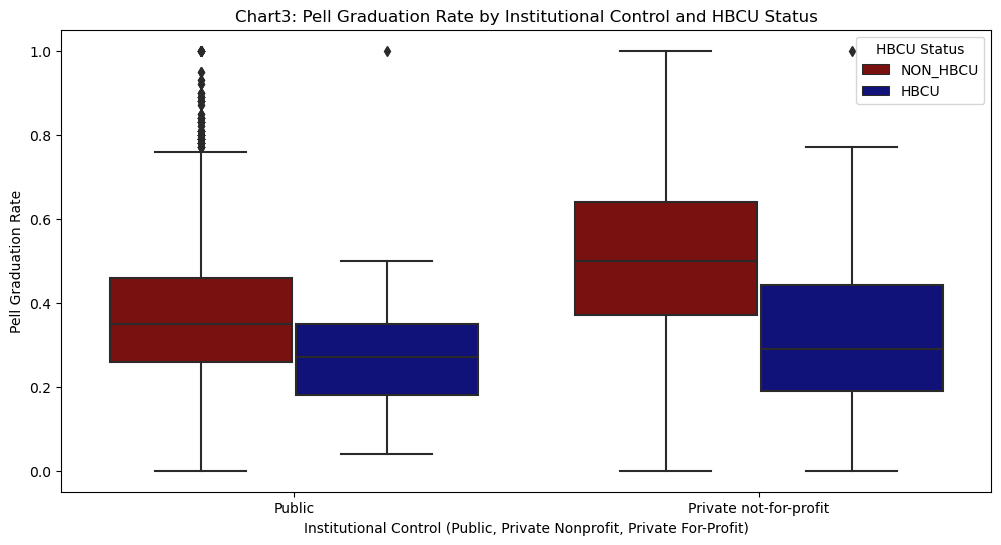

In [58]:

# Use matching string keys in the palette
palette = {"NON_HBCU": "darkred", "HBCU": "darkblue"}

# Re-attempt the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=PELL_GR_CLEANED, x="CONTROL", y="pell_grad_rate", hue="HBCU", palette=palette)
plt.title("Chart3: Pell Graduation Rate by Institutional Control and HBCU Status")
plt.xlabel("Institutional Control (Public, Private Nonprofit, Private For-Profit)")
plt.ylabel("Pell Graduation Rate")
plt.legend(title="HBCU Status")
plt.show()


## **Explanatory Analysis**

## Research Question 1 (Revised):
**What is the relationship between the percentage of students receiving Pell Grants and graduation rates within 150% of normal program time, and how does this relationship differ across 2-year and 4-year institutions, and by control (public vs. private)?**

### Analysis from Chart 1: Public vs. Private, 2-year vs. 4-year Institutions
This chart reveals several key findings:

- **4-year private not-for-profit institutions** show the highest graduation rates among Pell Grant recipients (51%), notably outperforming their **public 4-year** counterparts (40%).
- Among **2-year institutions**, **private not-for-profit** colleges again outperform **public** ones, with a Pell graduation rate of 63% compared to 33%.
- Across both levels (2-year and 4-year), **private institutions show consistently higher graduation rates** for Pell Grant recipients than public institutions.
- **Institution level also matters**: 4-year institutions generally have higher graduation rates than 2-year institutions within the same control group, except for private not-for-profits, where 2-year colleges outperform 4-year.

> **Interpretation:**  
There’s a clear relationship between institutional control and Pell Grant graduation outcomes. Private not-for-profits may provide environments or resources (e.g., smaller class sizes, more support services) that help Pell recipients graduate on time. This also suggests systemic disparities in how different institution types support low-income students.

---

## Research Question 2 (Revised):
**How do graduation outcomes for Pell Grant recipients differ between Historically Black Colleges and Universities (HBCUs) and non-HBCUs, across institutional type and level?**

### Analysis from Chart 2: Graduation Rates by HBCU Status, Institution Control, and Level

This faceted bar chart brings HBCU context into focus:

- **For 4-year institutions**:  
  - Non-HBCU private not-for-profits again show the highest Pell graduation rate (~51%).  
  - HBCUs (both public and private) exhibit **lower graduation rates** (32%) among Pell recipients compared to non-HBCUs.
- **For 2-year institutions**:  
  - Non-HBCU private not-for-profits maintain high Pell graduation rates (63%), while HBCUs, particularly public ones, fall significantly lower (20%).

> **Interpretation:**  
There appears to be a consistent performance gap between **HBCUs and non-HBCUs** in graduation rates for Pell Grant recipients. While HBCUs play a critical role in providing access to low-income and underrepresented students, this gap may reflect challenges around resource constraints, support services, or structural inequities. Notably, **HBCU public 2-year institutions show the lowest graduation rates**, highlighting an area needing targeted intervention.

---

### Chart 3: Box Plot – Graduation Rate by Control and HBCU Status

This box plot provides a distributional view, adding depth:

- **Non-HBCUs** (red) generally show **higher median and upper quartile values** in graduation rates, across both public and private sectors.
- **HBCUs** (blue) not only have **lower medians**, but also tighter interquartile ranges, suggesting more clustering at lower outcomes.
- There’s also **greater variability** in non-HBCU private institutions, with some Pell graduation rates reaching up to 1.0 (100%), whereas HBCUs rarely reach above ~0.75.

> **Interpretation:**  
This visualization confirms prior patterns: **Pell recipients at non-HBCUs generally have better graduation outcomes**, and there is more outcome variability across non-HBCUs, especially in the private sector. The relatively compressed distribution among HBCUs may point to systemic ceilings due to funding limitations, fewer academic resources, or student support disparities.

---

## Synthesis and Implications

Together, these charts suggest that:

1. **Institutional control and level significantly influence Pell graduation outcomes**, with private not-for-profits consistently performing better.
2. **HBCU designation correlates with lower Pell graduation rates**, even when controlling for institutional type — highlighting a need for equity-focused support and policy.
3. The disparities across institutional types and HBCU status suggest that **Pell Grant recipients do not have equitable outcomes**, and institutional context plays a critical role.

These findings contribute meaningfully to literature around **educational equity, socioeconomic disparities, and institutional effectiveness** — providing a strong empirical foundation for both policy advocacy and institutional reform.
